**Objetivos desta aula prática:**

1. Dividir dados em treino e teste com estratificação.
2. Avaliar modelos de classificação usando:
 - Matriz de Confusão
 - Acurácia, Precisão, Revocação (Recall), F1-Score
 - Curva ROC e AUC

3. Avaliar modelos de regressão usando:
 * MSE, RMSE, MAE e R²

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

dados = pd.read_csv('dados_aprovacao_alunos.csv')
x = dados[['nota', 'faltas']] # variaveis preditoras (dependente)
y = dados['aprovado'] # variavel alvo (classe)

In [2]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y # garantir que o conjunto de teste tenha a mesma proporção das saidas (evita testar uma saída que não foi treinada)
  )

In [3]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(x_train, y_train)

LogisticRegression()

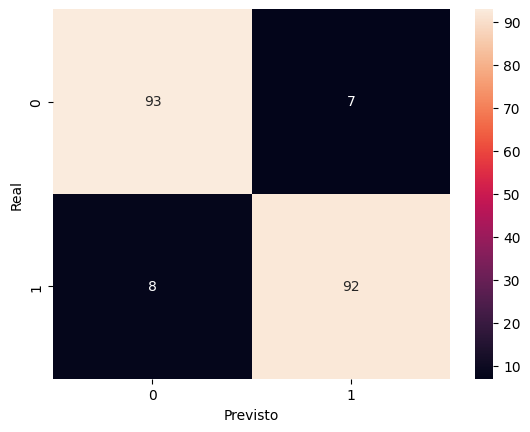

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = modelo.predict(x_test)
mc = confusion_matrix(y_test, y_pred)

sns.heatmap(mc, annot=True, fmt='d')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

- **VP (Verdadeiros Positivos)**: Alunos que **realmente reprovaram** e foram **corretamente previstos como reprovados**.
- **VN (Verdadeiros Negativos)**: Alunos que **realmente passaram** e foram **corretamente previstos como aprovados** pelo modelo.
- **FP (Falsos Positivos)**: Alunos que o modelo "achou" que reprovariam mas passaram  
- **FN (Falsos Negativos)**: Alunos que o modelo "achou" que passariam mas reprovaram

|||
|:-|:-|
|[🟩 VP: 93] | [🟥 FP: 7]|
|[🟨 FN: 8]  | [🟦 VN: 92]|

Legenda:

🟩 Verdadeiro Positivo  
🟦 Verdadeiro Negativo  
🟥 Falso Positivo (Erro I)  
🟨 Falso Negativo (Erro II)  

**Exercício:** Faça o cálculo manualmente das métricas a partir dos valores da matriz de confusão e preencha a tabela a seguir:

| Métrica | Fórmula | Cálculo | Resultado | Iterpretação |
|:-|:-|:-|:-:|:-|
|Acurácia|$\frac{VP+VN}{Total}$|$\frac{93+92}{200}$|$92.5\%$|92.5% das previsões estão corretas|
|Precisão|$\frac{VP}{VP+FP}$|$\frac{93}{93+7}$|$93.0\%$|Dos previstos como aprovados, 93% realmente passaram|
|Recall|$\frac{VP}{VP+FN}$|$\frac{93}{93+8}$|$92.1\%$|Dos alunos que passaram,92.1% foram identificados|
|F1-score|$\frac{2* prec * rec}{prec + rec}$|$\frac{1.71306}{1.851}$|$92.5\%$|Média harmônica entre Precisão e Recall|
|Especificidade|$\frac{VN}{VN+FP}$|$\frac{92}{92+7}$|$92.9\%$|Dos alunos que reprovaram, 92.9% foram identificados corretamente|
|Taxa de Erro|$\frac{FP+FN}{Total}$|$\frac{7+8}{200}$|$7.5\%$|7.5% das previsões estão incorretas|

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       100
           1       0.93      0.92      0.92       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



Text(0.5, 1.0, 'Curva ROC')

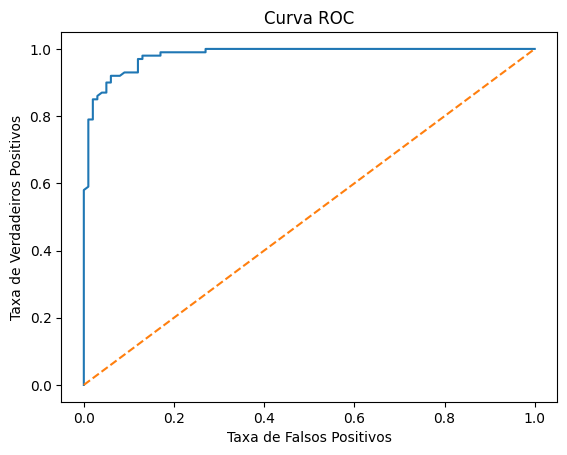

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = modelo.predict_proba(x_test)[:, 1] # Probabilidade de aprovação
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_prob):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')

Quanto mais proxima do angulo 90°, melhor o modelo. Quanto mais proxima da linha, pior.

Abaixo da linha = péssimo

# Métricas de Regressão

In [7]:
dados_reg = pd.read_csv('dados_previsao_nota.csv')
dados_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   horas_estudo  200 non-null    float64
 1   nota_final    200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [8]:
x_reg = dados_reg['horas_estudo'].values.reshape(-1,1)
y_reg = dados_reg['nota_final']

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(
    x_reg,
    y_reg,
    test_size=0.2,
    random_state=42
  )

In [9]:
from sklearn.linear_model import LinearRegression

modelo_reg = LinearRegression()
modelo_reg.fit(x_train_reg, y_train_reg)

LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred_reg = modelo_reg.predict(x_test_reg)

print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.2f}')
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg):.2f}')
print(f'R²: {r2_score(y_test_reg, y_pred_reg):.2f}')

MSE: 6.27
RMSE: 2.50
MAE: 1.95
R²: 0.38


## 🔍 **Escolha Baseada no Seu Objetivo**

| Métrica | Melhor Para...                    | Exemplo Prático                     | Cuidado!                          |
|---------|-----------------------------------|-------------------------------------|-----------------------------------|
| **RMSE** | Quando **erros grandes são graves** (e devem ser penalizados mais) | Prever doses de medicamentos (erros altos são perigosos) | Sensível a outliers               |
| **MAE**  | Quando **todos os erros têm igual importância** | Prever preços de produtos cotidianos | Não destaca erros graves          |
| **R²**   | Saber **% da variância explicada** pelo modelo | Comparar dois modelos de previsão de notas | Pode ser alto mesmo com erros grandes |
| **MSE**  | Otimização de modelos (foco nos **erros quadráticos**) | Uso interno em algoritmos de ML | Difícil interpretação direta      |

## 📌 **Regra Prática: Qual Métrica Escolher?**

1. **"Preciso entender o erro em unidades reais?"** → RMSE ou MAE  
   - RMSE se erros grandes forem críticos  
   - MAE se todos os erros forem igualmente importantes  

2. **"Quero comparar modelos diferentes?"** → R² (quanto maior, melhor)  

3. **"Meu modelo será usado para tomar decisões de alto risco?"** → RMSE (prioriza evitar erros graves)  

4. **"Meus dados têm muitos valores extremos?"** → MAE (é mais robusto)  

## 💡 **Exemplo com Notas de Alunos**
- Se você está prevendo **notas finais** para identificar alunos em risco:  
  - Use **RMSE** (errar em 5 pontos é pior que errar em 1)  
- Se está prevendo **aprovados/reprovados**:  
  - Use **R²** para ver se o modelo explica bem a variação nas notas  

## ⚠️ **Armadilhas Comuns**
- **Só usar R²**: Pode mascarar erros grandes se o modelo estiver enviesado  
- **Ignorar outliers**: RMSE vai inflacionar, MAE é mais justo  
- **Não contextualizar**: Um RMSE de 2 é bom? Depende! Se as notas vão de 0 a 10, é ótimo. Se vão de 0 a 100, é péssimo.  